In [ ]:
""" 
Changelog:
    Date: 26Sep2019Alex,Jocen
    Added: Added Linear Regression and ADABoost models 
    Made a function for repeated call of Cross Validation
    Commented on functions used in the notebook
    
    Date: 26Sep2019Jocen
    Added: Revised all MLP NN code to not have large hidden layers, eg. bigger than 200.
    
    Date: 25Sep2019David
    Added: Added GridsearchCV to KNN to check optimal numbers of neighbors. This is done with a for loop to test multiple 
    neighbors. It is then plotted into a plot with the accuracy. 
    Made it so graphviz is no longer a required enviroment.

    Date: 24Sep2019David
    Added: Multiple XGBoost model. Table with overview of tested XGBoost model. Code for the tree of the best XGBoost model.
    In classification - feature selection part, added a dataframe with the event lables and the corresponding event code.
    Adding timer to the codes to see how fast the model/cell is run.
    Added to the SVM trials for both RBF and for Linear. Both with 5, 7 and 8 features. 
    Cross Validation was done on both 10 splits and 20 splits.
    
    Date: 23Sep2019David
    Added: XGBoost code, with pipeline function and with XGBoost enviroment.
    Added a changelog.
    
    Date: 23Sep2019Jocen
    Added: Added code to ignore warnings.
    
    Date: Before 22Sep2019David
    Added: Started codebook and coded SVM, Multilayered perceptron  NN, K-Nearest Neighbors, Decision Tree, Random Forest, Gaussian Naive Bayes and XGBoost.
    Selection of features using SelectKBest.
    
"""

"""
Needed Enviroments:
    Graphviz (Not needed as of 25Sep2019)
    XGBoost
"""

# Assignment 3: Machine Leaarning

## Classification: Austin Weather Dataset

-----------------
-----------------

## Library Imports

In [2]:
'''
Import necessary libraries for running machine learning in this research
This cell contains libraries for ignoring warnings usually from cross validation
These do not affect the results but cuts down the length in output cell
'''
import sys
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=Warning)

In [3]:
'''
Import necessary libraries for running machine learning in this research
This cell contains libraries for the different models used
Validation metrics were also imported as point of comparison the models used
'''
# selection and model imports
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_tree
from matplotlib.pylab import rcParams

# metrics import
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#utility imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.utils.validation import column_or_1d
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
%matplotlib inline

In [4]:
'''
Loading the cleaned dataset from the previous assignment
'''
data = pd.read_csv('austin_weather_clean.csv')
print(data.shape)
print(data.head(2))

data = shuffle(data, random_state=23).reset_index(False)
print(data.shape)
data.head(2)

(1319, 21)
         Date  DewPointAvgF  DewPointHighF  DewPointLowF               Events  \
0  2013-12-21      9.444444      19.444444      6.111111  Rain , Thunderstorm   
1  2013-12-22      2.222222       6.111111     -2.222222                        

   HumidityAvgPercent  HumidityHighPercent  HumidityLowPercent  \
0                75.0                 93.0                57.0   
1                68.0                 93.0                43.0   

  PrecipitationSumInches  SeaLevelPressureAvgInches  ...  \
0     1.1684023368046736                  75.387351  ...   
1                    0.0                  76.530353  ...   

   SeaLevelPressureLowInches  TempAvgF  TempHighF  TempLowF  \
0                  75.158750      15.0       23.0       7.0   
1                  75.869952       8.0       13.0       3.0   

   VisibilityAvgMiles  VisibilityHighMiles  VisibilityLowMiles  WindAvgMPH  \
0            11.26538              16.0934             3.21868     6.43736   
1            16.093

,index,Date,DewPointAvgF,DewPointHighF,DewPointLowF,Events,HumidityAvgPercent,HumidityHighPercent,HumidityLowPercent,PrecipitationSumInches,...,SeaLevelPressureLowInches,TempAvgF,TempHighF,TempLowF,VisibilityAvgMiles,VisibilityHighMiles,VisibilityLowMiles,WindAvgMPH,WindGustMPH,WindHighMPH
0,25,2014-01-15,-5.000000,-1.666667,-8.888889,,35.0,49.0,21.0,0.0,...,76.631953,11.0,17.0,4.0,16.0934,16.0934,16.0934,6.43736,33.79614,22.53076
1,1077,2016-12-02,9.444444,13.888889,6.111111,Rain,77.0,90.0,63.0,0.5588011176022352,...,76.225552,14.0,17.0,10.0,16.0934,16.0934,8.0467,6.43736,27.35878,16.09340


------------------
------------------

## Pre-processing
### Further data cleaning from previous assignment dataset manipulation

In [5]:
'''
Apply LabelEncoder to convert the events into codes.
'''
le = LabelEncoder()
print("This is the events before encoding:", data['Events'].unique())

data['Events'] = le.fit_transform(data['Events'])
print("This is the events after encoding:", data['Events'].unique())


data.head(5)

This is the events before encoding: [' ' 'Rain' 'Rain , Thunderstorm' 'Fog' 'Fog , Rain'
 'Fog , Rain , Thunderstorm' 'Thunderstorm' 'Fog , Thunderstorm'
 'Rain , Snow']
This is the events after encoding: [0 5 7 1 2 3 8 4 6]


,index,Date,DewPointAvgF,DewPointHighF,DewPointLowF,Events,HumidityAvgPercent,HumidityHighPercent,HumidityLowPercent,PrecipitationSumInches,...,SeaLevelPressureLowInches,TempAvgF,TempHighF,TempLowF,VisibilityAvgMiles,VisibilityHighMiles,VisibilityLowMiles,WindAvgMPH,WindGustMPH,WindHighMPH
0,25,2014-01-15,-5.000000,-1.666667,-8.888889,0,35.0,49.0,21.0,0.0,...,76.631953,11.0,17.0,4.0,16.09340,16.0934,16.09340,6.43736,33.79614,22.53076
1,1077,2016-12-02,9.444444,13.888889,6.111111,5,77.0,90.0,63.0,0.5588011176022352,...,76.225552,14.0,17.0,10.0,16.09340,16.0934,8.04670,6.43736,27.35878,16.09340
2,620,2015-09-02,19.444444,21.111111,17.777778,0,65.0,90.0,39.0,0.0,...,75.920752,28.0,35.0,21.0,16.09340,16.0934,16.09340,6.43736,30.57746,19.31208
3,1104,2016-12-29,-2.777778,18.333333,-8.888889,0,51.0,84.0,18.0,0.0,...,76.403353,15.0,21.0,9.0,16.09340,16.0934,16.09340,14.48406,48.28020,28.96812
4,696,2015-11-17,12.777778,21.111111,5.555556,5,69.0,93.0,44.0,2.616205232410465,...,75.031750,16.0,23.0,8.0,12.87472,16.0934,1.60934,6.43736,48.28020,28.96812


In [6]:
'''
Python code demonstrate creating  
DataFrame from dict narray / lists  
By default addresses. 
'''
  
# Writing the data into a list
EventsTableList = {'Event Label':[' ', 'Rain', 'Rain , Thunderstorm', 'Fog', 'Fog , Rain','Fog , Rain , Thunderstorm', 'Thunderstorm', 'Fog , Thunderstorm', 'Rain , Snow'], 'Event Code':[0, 5, 7, 1, 2, 3, 8, 4, 6]} 
# Creating DataFrame based on list 
EventsTableDF = pd.DataFrame(EventsTableList) 
  
# Printing the datafra with sorted event codes.
print(EventsTableDF.sort_values('Event Code'))

                 Event Label  Event Code
0                                      0
3                        Fog           1
4                 Fog , Rain           2
5  Fog , Rain , Thunderstorm           3
7         Fog , Thunderstorm           4
1                       Rain           5
8                Rain , Snow           6
2        Rain , Thunderstorm           7
6               Thunderstorm           8


In [7]:
data['Events'].unique()

array([0, 5, 7, 1, 2, 3, 8, 4, 6], dtype=int64)

In [8]:
data["PrecipitationSumInches"].str.find("T").values.any()

True

In [9]:
'''
Additional preprocessing of dataset:
In precipitation, 'T' has been used to indicate a very minute record of precipitation.
This is replaced by a floating point number to include this feature in feature selection and ML
'''
data.replace('T', 0.0001)

,index,Date,DewPointAvgF,DewPointHighF,DewPointLowF,Events,HumidityAvgPercent,HumidityHighPercent,HumidityLowPercent,PrecipitationSumInches,...,SeaLevelPressureLowInches,TempAvgF,TempHighF,TempLowF,VisibilityAvgMiles,VisibilityHighMiles,VisibilityLowMiles,WindAvgMPH,WindGustMPH,WindHighMPH
0,25,2014-01-15,-5.000000,-1.666667,-8.888889,0,35.0,49.0,21.0,0.0,...,76.631953,11.0,17.0,4.0,16.09340,16.0934,16.09340,6.43736,33.79614,22.53076
1,1077,2016-12-02,9.444444,13.888889,6.111111,5,77.0,90.0,63.0,0.5588011176022352,...,76.225552,14.0,17.0,10.0,16.09340,16.0934,8.04670,6.43736,27.35878,16.09340
2,620,2015-09-02,19.444444,21.111111,17.777778,0,65.0,90.0,39.0,0.0,...,75.920752,28.0,35.0,21.0,16.09340,16.0934,16.09340,6.43736,30.57746,19.31208
3,1104,2016-12-29,-2.777778,18.333333,-8.888889,0,51.0,84.0,18.0,0.0,...,76.403353,15.0,21.0,9.0,16.09340,16.0934,16.09340,14.48406,48.28020,28.96812
4,696,2015-11-17,12.777778,21.111111,5.555556,5,69.0,93.0,44.0,2.616205232410465,...,75.031750,16.0,23.0,8.0,12.87472,16.0934,1.60934,6.43736,48.28020,28.96812
5,934,2016-07-12,22.222222,23.333333,20.555556,0,64.0,88.0,39.0,0.0,...,75.869952,31.0,37.0,25.0,16.09340,16.0934,16.09340,14.48406,45.06152,27.35878
6,724,2015-12-15,15.555556,18.333333,7.222222,0,86.0,100.0,71.0,0.0,...,75.336551,17.0,23.0,11.0,16.09340,16.0934,12.87472,6.43736,25.74944,14.48406
7,871,2016-05-10,21.111111,23.333333,17.777778,7,75.0,93.0,56.0,0.6858013716027432,...,75.615951,26.0,32.0,18.0,9.65604,16.0934,3.21868,12.87472,46.67086,27.35878
8,1304,2017-07-17,21.666667,23.888889,18.888889,7,63.0,88.0,38.0,0.0001,...,75.793752,31.0,36.0,25.0,16.09340,16.0934,16.09340,4.82802,37.01482,25.74944
9,264,2014-09-11,21.666667,23.888889,17.777778,0,60.0,85.0,35.0,0.0,...,75.717551,31.0,37.0,25.0,16.09340,16.0934,16.09340,8.04670,30.57746,16.09340


In [10]:
data.dtypes

index                           int64
Date                           object
DewPointAvgF                  float64
DewPointHighF                 float64
DewPointLowF                  float64
Events                          int32
HumidityAvgPercent            float64
HumidityHighPercent           float64
HumidityLowPercent            float64
PrecipitationSumInches         object
SeaLevelPressureAvgInches     float64
SeaLevelPressureHighInches    float64
SeaLevelPressureLowInches     float64
TempAvgF                      float64
TempHighF                     float64
TempLowF                      float64
VisibilityAvgMiles            float64
VisibilityHighMiles           float64
VisibilityLowMiles            float64
WindAvgMPH                    float64
WindGustMPH                   float64
WindHighMPH                   float64
dtype: object

In [11]:
'''
Many of the data was in type object. That has all been changed here. 
'''
data = data.convert_objects(convert_numeric=True)

In [12]:
data.dtypes

index                           int64
Date                           object
DewPointAvgF                  float64
DewPointHighF                 float64
DewPointLowF                  float64
Events                          int32
HumidityAvgPercent            float64
HumidityHighPercent           float64
HumidityLowPercent            float64
PrecipitationSumInches        float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureHighInches    float64
SeaLevelPressureLowInches     float64
TempAvgF                      float64
TempHighF                     float64
TempLowF                      float64
VisibilityAvgMiles            float64
VisibilityHighMiles           float64
VisibilityLowMiles            float64
WindAvgMPH                    float64
WindGustMPH                   float64
WindHighMPH                   float64
dtype: object

In [13]:
'''
Further pre-processing
Checking for NA values
'''
data.isnull().values.any()

True

In [14]:
data = data.fillna(0.0001)

data.head(10)

,index,Date,DewPointAvgF,DewPointHighF,DewPointLowF,Events,HumidityAvgPercent,HumidityHighPercent,HumidityLowPercent,PrecipitationSumInches,...,SeaLevelPressureLowInches,TempAvgF,TempHighF,TempLowF,VisibilityAvgMiles,VisibilityHighMiles,VisibilityLowMiles,WindAvgMPH,WindGustMPH,WindHighMPH
0,25,2014-01-15,-5.000000,-1.666667,-8.888889,0,35.0,49.0,21.0,0.000000,...,76.631953,11.0,17.0,4.0,16.09340,16.0934,16.09340,6.43736,33.79614,22.53076
1,1077,2016-12-02,9.444444,13.888889,6.111111,5,77.0,90.0,63.0,0.558801,...,76.225552,14.0,17.0,10.0,16.09340,16.0934,8.04670,6.43736,27.35878,16.09340
2,620,2015-09-02,19.444444,21.111111,17.777778,0,65.0,90.0,39.0,0.000000,...,75.920752,28.0,35.0,21.0,16.09340,16.0934,16.09340,6.43736,30.57746,19.31208
3,1104,2016-12-29,-2.777778,18.333333,-8.888889,0,51.0,84.0,18.0,0.000000,...,76.403353,15.0,21.0,9.0,16.09340,16.0934,16.09340,14.48406,48.28020,28.96812
4,696,2015-11-17,12.777778,21.111111,5.555556,5,69.0,93.0,44.0,2.616205,...,75.031750,16.0,23.0,8.0,12.87472,16.0934,1.60934,6.43736,48.28020,28.96812
5,934,2016-07-12,22.222222,23.333333,20.555556,0,64.0,88.0,39.0,0.000000,...,75.869952,31.0,37.0,25.0,16.09340,16.0934,16.09340,14.48406,45.06152,27.35878
6,724,2015-12-15,15.555556,18.333333,7.222222,0,86.0,100.0,71.0,0.000000,...,75.336551,17.0,23.0,11.0,16.09340,16.0934,12.87472,6.43736,25.74944,14.48406
7,871,2016-05-10,21.111111,23.333333,17.777778,7,75.0,93.0,56.0,0.685801,...,75.615951,26.0,32.0,18.0,9.65604,16.0934,3.21868,12.87472,46.67086,27.35878
8,1304,2017-07-17,21.666667,23.888889,18.888889,7,63.0,88.0,38.0,0.000100,...,75.793752,31.0,36.0,25.0,16.09340,16.0934,16.09340,4.82802,37.01482,25.74944
9,264,2014-09-11,21.666667,23.888889,17.777778,0,60.0,85.0,35.0,0.000000,...,75.717551,31.0,37.0,25.0,16.09340,16.0934,16.09340,8.04670,30.57746,16.09340


---------------------
---------------------

## Selecting Features
### SelectKBest: Based on mutual information

In [15]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
#This will select the 10 best features.
new = SelectKBest(mutual_info_classif, k=10)
new.fit(data.iloc[:,3:22], data['Events'])

new_data = new.transform(data.iloc[:,3:22])
new_data.shape
print(new.get_support(indices=True))

[ 0  2  3  4  5  6 12 13 15 18]


Features Mutual Info Scores: [0.06671063 0.04555175 1.04001626 0.20572966 0.1681852  0.1695799
 0.55246166 0.03691216 0.01824682 0.04384119 0.08433061 0.05626634
 0.05634931 0.20371398 0.         0.42437967 0.01854911 0.04741379
 0.03152892]


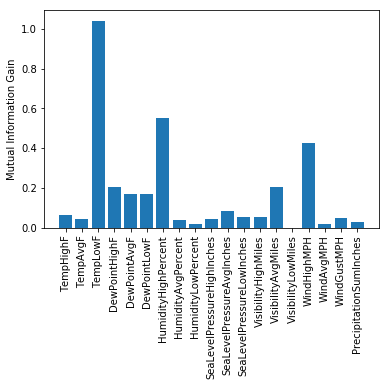

In [16]:
# This will not select the features but simply make a figure with the mutual information of each the features. 
# It will allow for manual selection of the highest scored features.

features = mutual_info_classif(data.iloc[:,3:22], data['Events'], random_state=20)
print("Features Mutual Info Scores: {}".format(features))

PredictorFeature = ['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH','PrecipitationSumInches']

plt.bar(range(len(PredictorFeature)), features)
plt.ylabel("Mutual Information Gain")
plt.xticks(range(len(PredictorFeature)), PredictorFeature, rotation='vertical')
plt.show()

In [17]:
#Sorting the information scores
sorted_features = sorted(features, reverse=True)
print(sorted_features)

[1.0400162568783085, 0.5524616555466306, 0.4243796731090772, 0.20572965548194588, 0.20371397759997856, 0.16957989605964863, 0.1681851961815206, 0.08433061490255223, 0.06671062906780811, 0.05634931237719498, 0.056266341600819336, 0.04741379283532288, 0.045551749965422994, 0.04384119299372702, 0.03691216437770084, 0.03152891785826295, 0.018549110620773357, 0.018246818998848724, 0.0]


In [18]:
data_new = data[['Events','TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'VisibilityAvgMiles', 'WindHighMPH']]

data_new.head(10)

,Events,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,VisibilityAvgMiles,WindHighMPH
0,0,4.0,-1.666667,-5.000000,-8.888889,49.0,16.09340,22.53076
1,5,10.0,13.888889,9.444444,6.111111,90.0,16.09340,16.09340
2,0,21.0,21.111111,19.444444,17.777778,90.0,16.09340,19.31208
3,0,9.0,18.333333,-2.777778,-8.888889,84.0,16.09340,28.96812
4,5,8.0,21.111111,12.777778,5.555556,93.0,12.87472,28.96812
5,0,25.0,23.333333,22.222222,20.555556,88.0,16.09340,27.35878
6,0,11.0,18.333333,15.555556,7.222222,100.0,16.09340,14.48406
7,7,18.0,23.333333,21.111111,17.777778,93.0,9.65604,27.35878
8,7,25.0,23.888889,21.666667,18.888889,88.0,16.09340,25.74944
9,0,25.0,23.888889,21.666667,17.777778,85.0,16.09340,16.09340


---------------------

### Based on SelectKBest - f_classif 
This was the initial selection method of the features. It ended not being used as it uses p-value which is not a correct way to do feature selection. This is usually the method that is used in regression. Every time a feature is removed, all other p-values might change hence why the function must be run every time a feature is eliminated. 

[ 21.31972226  11.71721367   7.00709203  13.31203826  11.6215115
   9.76537205  42.3144981   96.9578782  100.11550656   7.85795155
   6.99519477   6.3225519   11.06711272 139.26893795 228.68411184
  23.96366748   0.80594161  19.40717215 152.34889427]


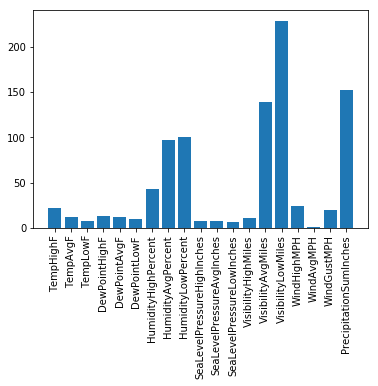

In [19]:
PredictorFeature = ['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH','PrecipitationSumInches']

# Perform feature selection
SelectedFeatures = SelectKBest(f_classif, k=5)
SelectedFeatures.fit(data[PredictorFeature], data['Events'])

print(-np.log10(SelectedFeatures.pvalues_))

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(SelectedFeatures.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(PredictorFeature)), scores)
plt.xticks(range(len(PredictorFeature)), PredictorFeature, rotation='vertical')
plt.show()

---------------------
---------------------

## Model: Support Vector Machines
### 7 best features, 10-fold validation

In [20]:
#Splitting the data into Features and Target.
X = data_new[['TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'VisibilityAvgMiles', 'WindHighMPH']]
Y = data_new[['Events']]
#Making Y to array
Y = np.asarray(Y)

#Normalize X
X_n = normalize(X)
#Making a test train set with the test size being 30%. Giving a specific seed (42) so that if the same function is run again, it will yield same data sets. 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_n, Y, test_size=0.3, random_state=42)


In [21]:
'''
Initialize function for running K-fold validation
This function is used to every model except Linear Regression
'''
def checkKfoldAcc(mod, x, y, folds=10):
    print("This is the settings for the model:", mod)

    #Printout cross-validation scores
    Scores_kfold1 = cross_val_score(mod, x, y, cv=folds, scoring='accuracy')
    print("Accuracy mean : {}".format(Scores_kfold1.mean()))

    Scores_kfold2 = cross_val_score(mod, x, y, cv=folds, scoring='f1_weighted')
    print("F-Score mean : {}".format(Scores_kfold2.mean()))

    Scores_kfold3 = cross_val_score(mod, x, y, cv=folds, scoring='precision_macro')
    print("Precision mean : {}".format(Scores_kfold3.mean()))

    Scores_kfold4 = cross_val_score(mod, x, y, cv=folds, scoring='recall_macro')
    print("Recall mean : {}".format(Scores_kfold4.mean()))

In [22]:
%%time
'''
Making a SVM model with the RBF kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='rbf'))])
Event_Classification.fit(Xtrain, Ytrain)
kfold = KFold(n_splits=10, random_state=23)

print("Training accuracy: {}".format(accuracy_score(Ytrain, Event_Classification.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, Event_Classification.predict(Xtest))))

checkKfoldAcc(Event_Classification, X_n, Y, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6846229470275272
F-Score mean : 0.5573852851048857
Precision mean : 0.10335883370234515
Recall mean : 0.15119047619047618
Wall time: 1.57 s


In [23]:
%%time
'''
Making a SVM model with the linear kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='linear'))])
Event_Classification.fit(Xtrain, Ytrain)
kfold = KFold(n_splits=10, random_state=23)

print("Training accuracy: {}".format(accuracy_score(Ytrain, Event_Classification.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, Event_Classification.predict(Xtest))))

checkKfoldAcc(Event_Classification, X_n, Y, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6846229470275272
F-Score mean : 0.5573852851048857
Precision mean : 0.10335883370234515
Recall mean : 0.15119047619047618
Wall time: 764 ms


### 7 best features, 20-fold validation

In [24]:
%%time
'''
Making a SVM model with the RBF kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='rbf'))])
Event_Classification.fit(Xtrain, Ytrain)
kfold = KFold(n_splits=20, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Ytrain, Event_Classification.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, Event_Classification.predict(Xtest))))

checkKfoldAcc(Event_Classification, X_n, Y, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6845804195804195
F-Score mean : 0.5581087298548677
Precision mean : 0.12482364857364858
Recall mean : 0.18148809523809523
Wall time: 2.74 s


In [25]:
%%time
'''
Making a SVM model with the kernel linear
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='linear'))])
Event_Classification.fit(Xtrain, Ytrain)
kfold = KFold(n_splits=20, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Ytrain, Event_Classification.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, Event_Classification.predict(Xtest))))

checkKfoldAcc(Event_Classification, X_n, Y, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6845804195804195
F-Score mean : 0.5581087298548677
Precision mean : 0.12482364857364858
Recall mean : 0.18148809523809523
Wall time: 1.65 s


### 5 best features, 10-fold validation

In [26]:
data_new5best = data[['Events','TempLowF', 'DewPointHighF', 'HumidityHighPercent', 'VisibilityAvgMiles', 'WindHighMPH']]
data_new5best.head(10)

,Events,TempLowF,DewPointHighF,HumidityHighPercent,VisibilityAvgMiles,WindHighMPH
0,0,4.0,-1.666667,49.0,16.09340,22.53076
1,5,10.0,13.888889,90.0,16.09340,16.09340
2,0,21.0,21.111111,90.0,16.09340,19.31208
3,0,9.0,18.333333,84.0,16.09340,28.96812
4,5,8.0,21.111111,93.0,12.87472,28.96812
5,0,25.0,23.333333,88.0,16.09340,27.35878
6,0,11.0,18.333333,100.0,16.09340,14.48406
7,7,18.0,23.333333,93.0,9.65604,27.35878
8,7,25.0,23.888889,88.0,16.09340,25.74944
9,0,25.0,23.888889,85.0,16.09340,16.09340


In [27]:
X5b = data_new5best[['TempLowF', 'DewPointHighF', 'HumidityHighPercent', 'VisibilityAvgMiles', 'WindHighMPH']]
Y5b = data_new5best[['Events']]
Y5b = np.asarray(Y5b)

X5b_n = normalize(X5b)

X5btrain, X5btest, Y5btrain, Y5btest = train_test_split(X5b_n, Y5b, test_size=0.3, random_state=42)

In [28]:
%%time
'''
Making a SVM model with the RBF kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='rbf'))])
Event_Classification.fit(X5btrain, Y5btrain)
kfold = KFold(n_splits=10, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Y5btrain, Event_Classification.predict(X5btrain))))
print("Testing accuracy : {}".format(accuracy_score(Y5btest, Event_Classification.predict(X5btest))))

checkKfoldAcc(Event_Classification, X5b_n, Y5b, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6846229470275272
F-Score mean : 0.5573852851048857
Precision mean : 0.10335883370234515
Recall mean : 0.15119047619047618
Wall time: 1.23 s


In [29]:
%%time
'''
Making a SVM model with the linear kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='linear'))])
Event_Classification.fit(X5btrain, Y5btrain)
kfold = KFold(n_splits=10, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Y5btrain, Event_Classification.predict(X5btrain))))
print("Testing accuracy : {}".format(accuracy_score(Y5btest, Event_Classification.predict(X5btest))))

checkKfoldAcc(Event_Classification, X5b_n, Y5b, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6846229470275272
F-Score mean : 0.5573852851048857
Precision mean : 0.10335883370234515
Recall mean : 0.15119047619047618
Wall time: 617 ms


### 5 best features, 20-fold validation

In [30]:
%%time
'''
Making a SVM model with the RBF kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='rbf'))])
Event_Classification.fit(X5btrain, Y5btrain)
kfold = KFold(n_splits=20, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Y5btrain, Event_Classification.predict(X5btrain))))
print("Testing accuracy : {}".format(accuracy_score(Y5btest, Event_Classification.predict(X5btest))))

checkKfoldAcc(Event_Classification, X5b_n, Y5b, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6845804195804195
F-Score mean : 0.5581087298548677
Precision mean : 0.12482364857364858
Recall mean : 0.18148809523809523
Wall time: 2.46 s


In [31]:
%%time
'''
Making a SVM model with the linear kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='linear'))])
Event_Classification.fit(X5btrain, Y5btrain)
kfold = KFold(n_splits=20, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Y5btrain, Event_Classification.predict(X5btrain))))
print("Testing accuracy : {}".format(accuracy_score(Y5btest, Event_Classification.predict(X5btest))))

checkKfoldAcc(Event_Classification, X5b_n, Y5b, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6845804195804195
F-Score mean : 0.5581087298548677
Precision mean : 0.12482364857364858
Recall mean : 0.18148809523809523
Wall time: 1.33 s


### 8 best features, 10-fold validation

In [32]:
data_new8best = data[['Events','TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'VisibilityAvgMiles', 'WindHighMPH', 'SeaLevelPressureAvgInches']]

X8b = data_new8best[['TempLowF', 'DewPointHighF', 'HumidityHighPercent', 'VisibilityAvgMiles', 'WindHighMPH', 'SeaLevelPressureAvgInches']]
Y8b = data_new8best[['Events']]
Y8b = np.asarray(Y8b)

X8b_n = normalize(X8b)

X8btrain, X8btest, Y8btrain, Y8btest = train_test_split(X8b_n, Y8b, test_size=0.3, random_state=42)


In [33]:
%%time
'''
Making a SVM model with the RBF kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='rbf'))])
Event_Classification.fit(X8btrain, Y8btrain)
kfold = KFold(n_splits=10, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Y8btrain, Event_Classification.predict(X8btrain))))
print("Testing accuracy : {}".format(accuracy_score(Y8btest, Event_Classification.predict(X8btest))))

checkKfoldAcc(Event_Classification, X8b_n, Y8b, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6846229470275272
F-Score mean : 0.5573852851048857
Precision mean : 0.10335883370234515
Recall mean : 0.15119047619047618
Wall time: 1.18 s


In [34]:
%%time
'''
Making a SVM model with the linear kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='linear'))])
Event_Classification.fit(X8btrain, Y8btrain)
kfold = KFold(n_splits=10, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Y8btrain, Event_Classification.predict(X8btrain))))
print("Testing accuracy : {}".format(accuracy_score(Y8btest, Event_Classification.predict(X8btest))))

checkKfoldAcc(Event_Classification, X8b_n, Y8b, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6846229470275272
F-Score mean : 0.5573852851048857
Precision mean : 0.10335883370234515
Recall mean : 0.15119047619047618
Wall time: 638 ms


### 8 best features, 20-fold validation

In [35]:
%%time
'''
Making a SVM model with the RBF kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='rbf'))])
Event_Classification.fit(X8btrain, Y8btrain)
kfold = KFold(n_splits=20, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Y8btrain, Event_Classification.predict(X8btrain))))
print("Testing accuracy : {}".format(accuracy_score(Y8btest, Event_Classification.predict(X8btest))))

checkKfoldAcc(Event_Classification, X8b_n, Y8b, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6845804195804195
F-Score mean : 0.5581087298548677
Precision mean : 0.12482364857364858
Recall mean : 0.18148809523809523
Wall time: 2.41 s


In [36]:
%%time
'''
Making a SVM model with the linear kernel
Train and test the model using the K-fold validation function
'''

Event_Classification = Pipeline(steps=[('svm', SVC(kernel='linear'))])
Event_Classification.fit(X8btrain, Y8btrain)
kfold = KFold(n_splits=20, random_state=42)

print("Training accuracy: {}".format(accuracy_score(Y8btrain, Event_Classification.predict(X8btrain))))
print("Testing accuracy : {}".format(accuracy_score(Y8btest, Event_Classification.predict(X8btest))))

checkKfoldAcc(Event_Classification, X8b_n, Y8b, kfold)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Accuracy mean : 0.6845804195804195
F-Score mean : 0.5581087298548677
Precision mean : 0.12482364857364858
Recall mean : 0.18148809523809523
Wall time: 1.28 s


## Results for the SVM 
### Comparison of the models

Many models for the SVM were tested. Both with different kernels and with different numbers of features. 
For all the models, the same accuracy was optained. 
This can be seen in the table below. 


| Number of Features | Kernel | Kfold(Splits) | Train Accuracy | Test Accuracy | Cross Validation Accuracy |
| :---: | :--- | :---: | :---: | :---: | :---: |
| 7 | rbf | 10  | 0.6901 | 0.6717 | 0.6846 |
| 7 | linear | 10 | 0.6901 | 0.6717  | 0.6846 |
| 7 | rbf | 20 | 0.6901 | 0.6717  | 0.6846 |
| 7 | linear | 20 | 0.6901 | 0.6717 | 0.6846 |
| 5 | rbf | 10  | 0.6901 | 0.6717 | 0.6846 |
| 5 | linear | 10 | 0.6901 | 0.6717  | 0.6846 |
| 5 | rbf | 20 | 0.6901 | 0.6717  | 0.6846 |
| 5 | linear | 20 | 0.6901 | 0.6717 | 0.6846 |
| 8 | rbf | 10  | 0.6901 | 0.6717 | 0.6846 |
| 8 | linear | 10 | 0.6901 | 0.6717  | 0.6846 |
| 8 | rbf | 20 | 0.6901 | 0.6717  | 0.6846 |
| 8 | linear | 20 | 0.6901 | 0.6717 | 0.6846  |








---------------------
---------------------

## Model: Decision Tree

In [37]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)

# Fit our training data
treeclf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [38]:
print("Training accuracy: {}".format(accuracy_score(Ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, treeclf.predict(Xtest))))

Training accuracy: 0.7789815817984832
Testing accuracy : 0.7095959595959596


Accuracy for each fold: [0.65957447 0.70212766 0.73404255 0.69148936 0.70967742 0.68817204
 0.69565217 0.67777778 0.74444444 0.70786517]
Mean Accuracy: 0.7010823069593375


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

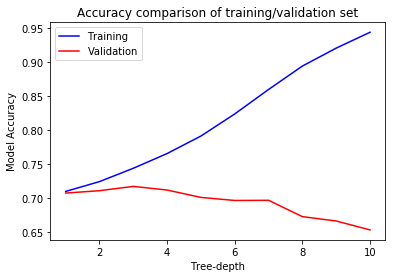

In [39]:
scores = cross_val_score(treeclf, Xtrain, Ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

# depth takes values from 1 to 10
max_depth_range = range(1, 11)

# do 10-fold cross-validation for each value in max_depth_range and return the accuracy scores. 
train_scores, valid_scores = validation_curve( treeclf, Xtrain, Ytrain, 
                                              param_range=max_depth_range, param_name="max_depth",
                                              cv=10, scoring="accuracy")

mean_train_score = np.mean(train_scores, axis=1) 
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

Accuracy for each fold: [0.6884058  0.68888889 0.67910448 0.75       0.76335878 0.71755725
 0.69465649 0.69767442 0.71317829 0.70542636]
Mean Accuracy: 0.7098250752453691


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

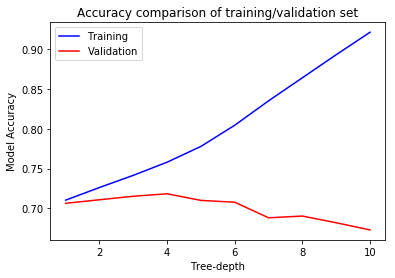

In [40]:
scores = cross_val_score(treeclf, X_n, Y, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

# depth takes values from 1 to 10
max_depth_range = range(1, 11)

# do 10-fold cross-validation for each value in max_depth_range and return the accuracy scores. 
train_scores, valid_scores = validation_curve( treeclf, X_n, Y, 
                                              param_range=max_depth_range, param_name="max_depth",
                                              cv=10, scoring="accuracy")

mean_train_score = np.mean(train_scores, axis=1) 
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [41]:
Scores_kfold1 = cross_val_score(treeclf, Xtest, Ytest, cv=10, scoring='accuracy')
print(" Cross validation Accuracy mean Accuracy mean : {}".format(Scores_kfold1.mean()))

 Cross validation Accuracy mean Accuracy mean : 0.6981396673501936


In [42]:
treeclf.fit(X_n, Y)

Scores_kfold1 = cross_val_score(treeclf, X_n, Y, cv=100, scoring='accuracy')
print(" Cross validation Accuracy mean Accuracy mean : {}".format(Scores_kfold1.mean()))

 Cross validation Accuracy mean Accuracy mean : 0.7131986510221806


In [43]:
%%time
'''
Train and test the model using the K-fold validation function
'''
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(Xtrain, Ytrain)
print("Training accuracy: {}".format(accuracy_score(Ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, treeclf.predict(Xtest))))

kfold1 = KFold(n_splits=10, random_state=23)

checkKfoldAcc(treeclf, X_n, Y, kfold1)

Training accuracy: 0.7453954496208017
Testing accuracy : 0.7196969696969697
This is the settings for the model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')
Accuracy mean : 0.726295396715244
F-Score mean : 0.6849064771348307
Precision mean : 0.2771440787506455
Recall mean : 0.2712228658780017
Wall time: 157 ms


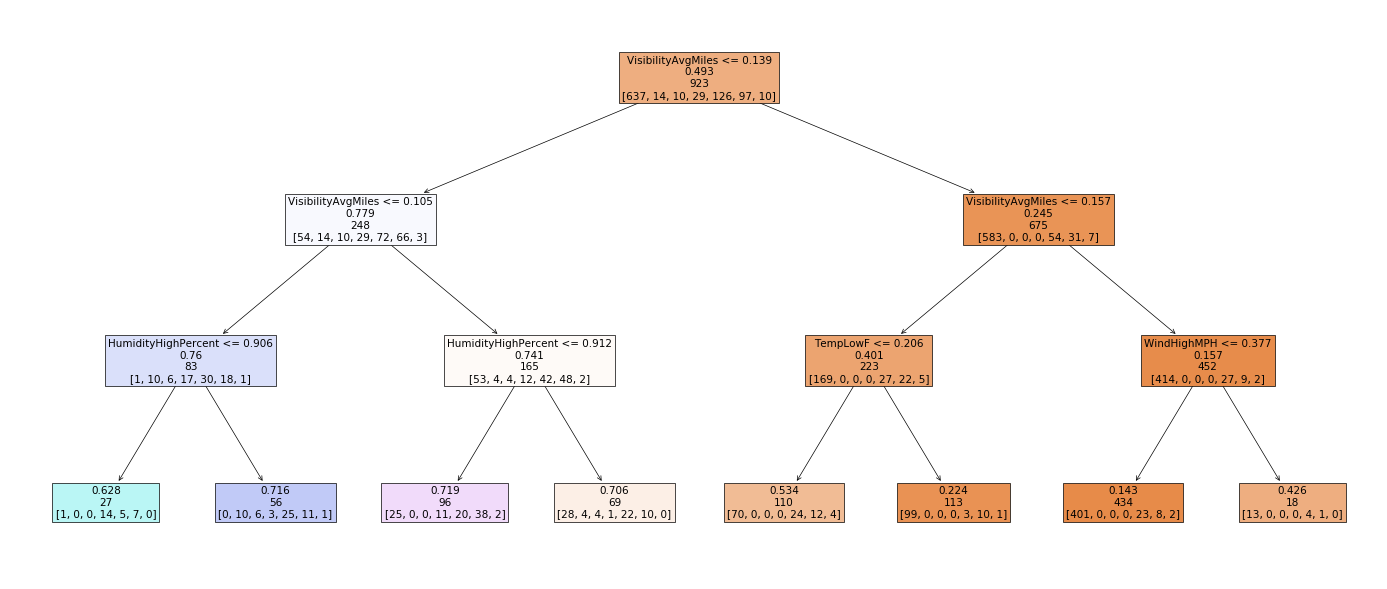

In [44]:
'''
Draw tree with max depth of 3 to visualize the model
'''
plt.figure(figsize=(35, 15),dpi=50)
FeaturesDT= ['TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'VisibilityAvgMiles', 'WindHighMPH']
treeclf = DecisionTreeClassifier(max_depth=3)
tree.plot_tree(treeclf.fit(Xtrain, Ytrain), filled=True, label=all, fontsize=15, feature_names=FeaturesDT) 
plt.show()

In [45]:
#This section is abundant because a matplotlib written instead. THis makes it so graphviz is no longer needed. 

#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus


#dot_data = StringIO()
#export_graphviz(treeclf, out_file=dot_data,
#                feature_names = FeaturesDT,
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())



---------------------
---------------------

## Model: Random Forest

In [46]:
'''
Create an instance of the Random Forest Model with max depth of 3.
'''
RFclf = RandomForestClassifier(max_depth=3, random_state=0)

#fitting data to random forest model
RFclf.fit(Xtrain, Ytrain)  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [47]:
'''
Train and test the model using the K-fold validation function
'''
print("Training accuracy: {}".format(accuracy_score(Ytrain, RFclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, RFclf.predict(Xtest))))

kfold1 = KFold(n_splits=10, random_state=23)

checkKfoldAcc(RFclf, X_n, Y, kfold1)

Training accuracy: 0.7150595882990249
Testing accuracy : 0.7171717171717171
This is the settings for the model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy mean : 0.6990226694425169
F-Score mean : 0.6219737060050244
Precision mean : 0.22138251781814153
Recall mean : 0.19380231968722442


In [48]:
'''
Create an instance of the Random Forest Model with max depth of 4.
'''
RFclf = RandomForestClassifier(max_depth=4, random_state=0)

#fitting data to random forest model
RFclf.fit(Xtrain, Ytrain)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
%%time
'''
Train and test the model using the K-fold validation function
'''
print("Training accuracy: {}".format(accuracy_score(Ytrain, RFclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, RFclf.predict(Xtest))))

kfold1 = KFold(n_splits=10, random_state=23)

checkKfoldAcc(RFclf, X_n, Y, kfold1)

Training accuracy: 0.7659804983748646
Testing accuracy : 0.7121212121212122
This is the settings for the model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy mean : 0.7217441591487394
F-Score mean : 0.6656000031323235
Precision mean : 0.23840057705330192
Recall mean : 0.22664830692367027
Wall time: 635 ms


In [50]:
'''
Create an instance of the Random Forest Model with max depth of 4.
'''
RFclf = RandomForestClassifier(max_depth=5, random_state=0)

#fitting data to random forest model
RFclf.fit(Xtrain, Ytrain)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
%%time
'''
Train and test the model using the K-fold validation function
'''
print("Training accuracy: {}".format(accuracy_score(Ytrain, RFclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, RFclf.predict(Xtest))))

kfold1 = KFold(n_splits=10, random_state=23)

checkKfoldAcc(RFclf, X_n, Y, kfold1)

Training accuracy: 0.7952329360780065
Testing accuracy : 0.6944444444444444
This is the settings for the model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy mean : 0.7103805227851029
F-Score mean : 0.6643784641472431
Precision mean : 0.26150518275061085
Recall mean : 0.24195484219449503
Wall time: 743 ms


Accuracy for each fold: [0.72340426 0.68085106 0.70212766 0.69148936 0.75268817 0.70967742
 0.76086957 0.72222222 0.74444444 0.71910112]
Mean Accuracy: 0.7206875287302945


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

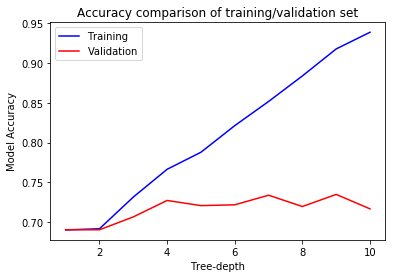

In [52]:
scores = cross_val_score(RFclf, Xtrain, Ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

# depth takes values from 1 to 10
max_depth_range = range(1, 11)

# do 10-fold cross-validation for each value in max_depth_range and return the accuracy scores. 
train_scores, valid_scores = validation_curve(RFclf, Xtrain, Ytrain, 
                                              param_range=max_depth_range, param_name="max_depth",
                                              cv=10, scoring="accuracy")

mean_train_score = np.mean(train_scores, axis=1) 
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")


In [53]:
RFclf.fit(X_n, Y)  
Scores_kfold1 = cross_val_score(RFclf, X_n, Y, cv=100, scoring='accuracy')
print(" Cross validation Accuracy mean Accuracy mean : {}".format(Scores_kfold1.mean()))

 Cross validation Accuracy mean Accuracy mean : 0.7313466378392849


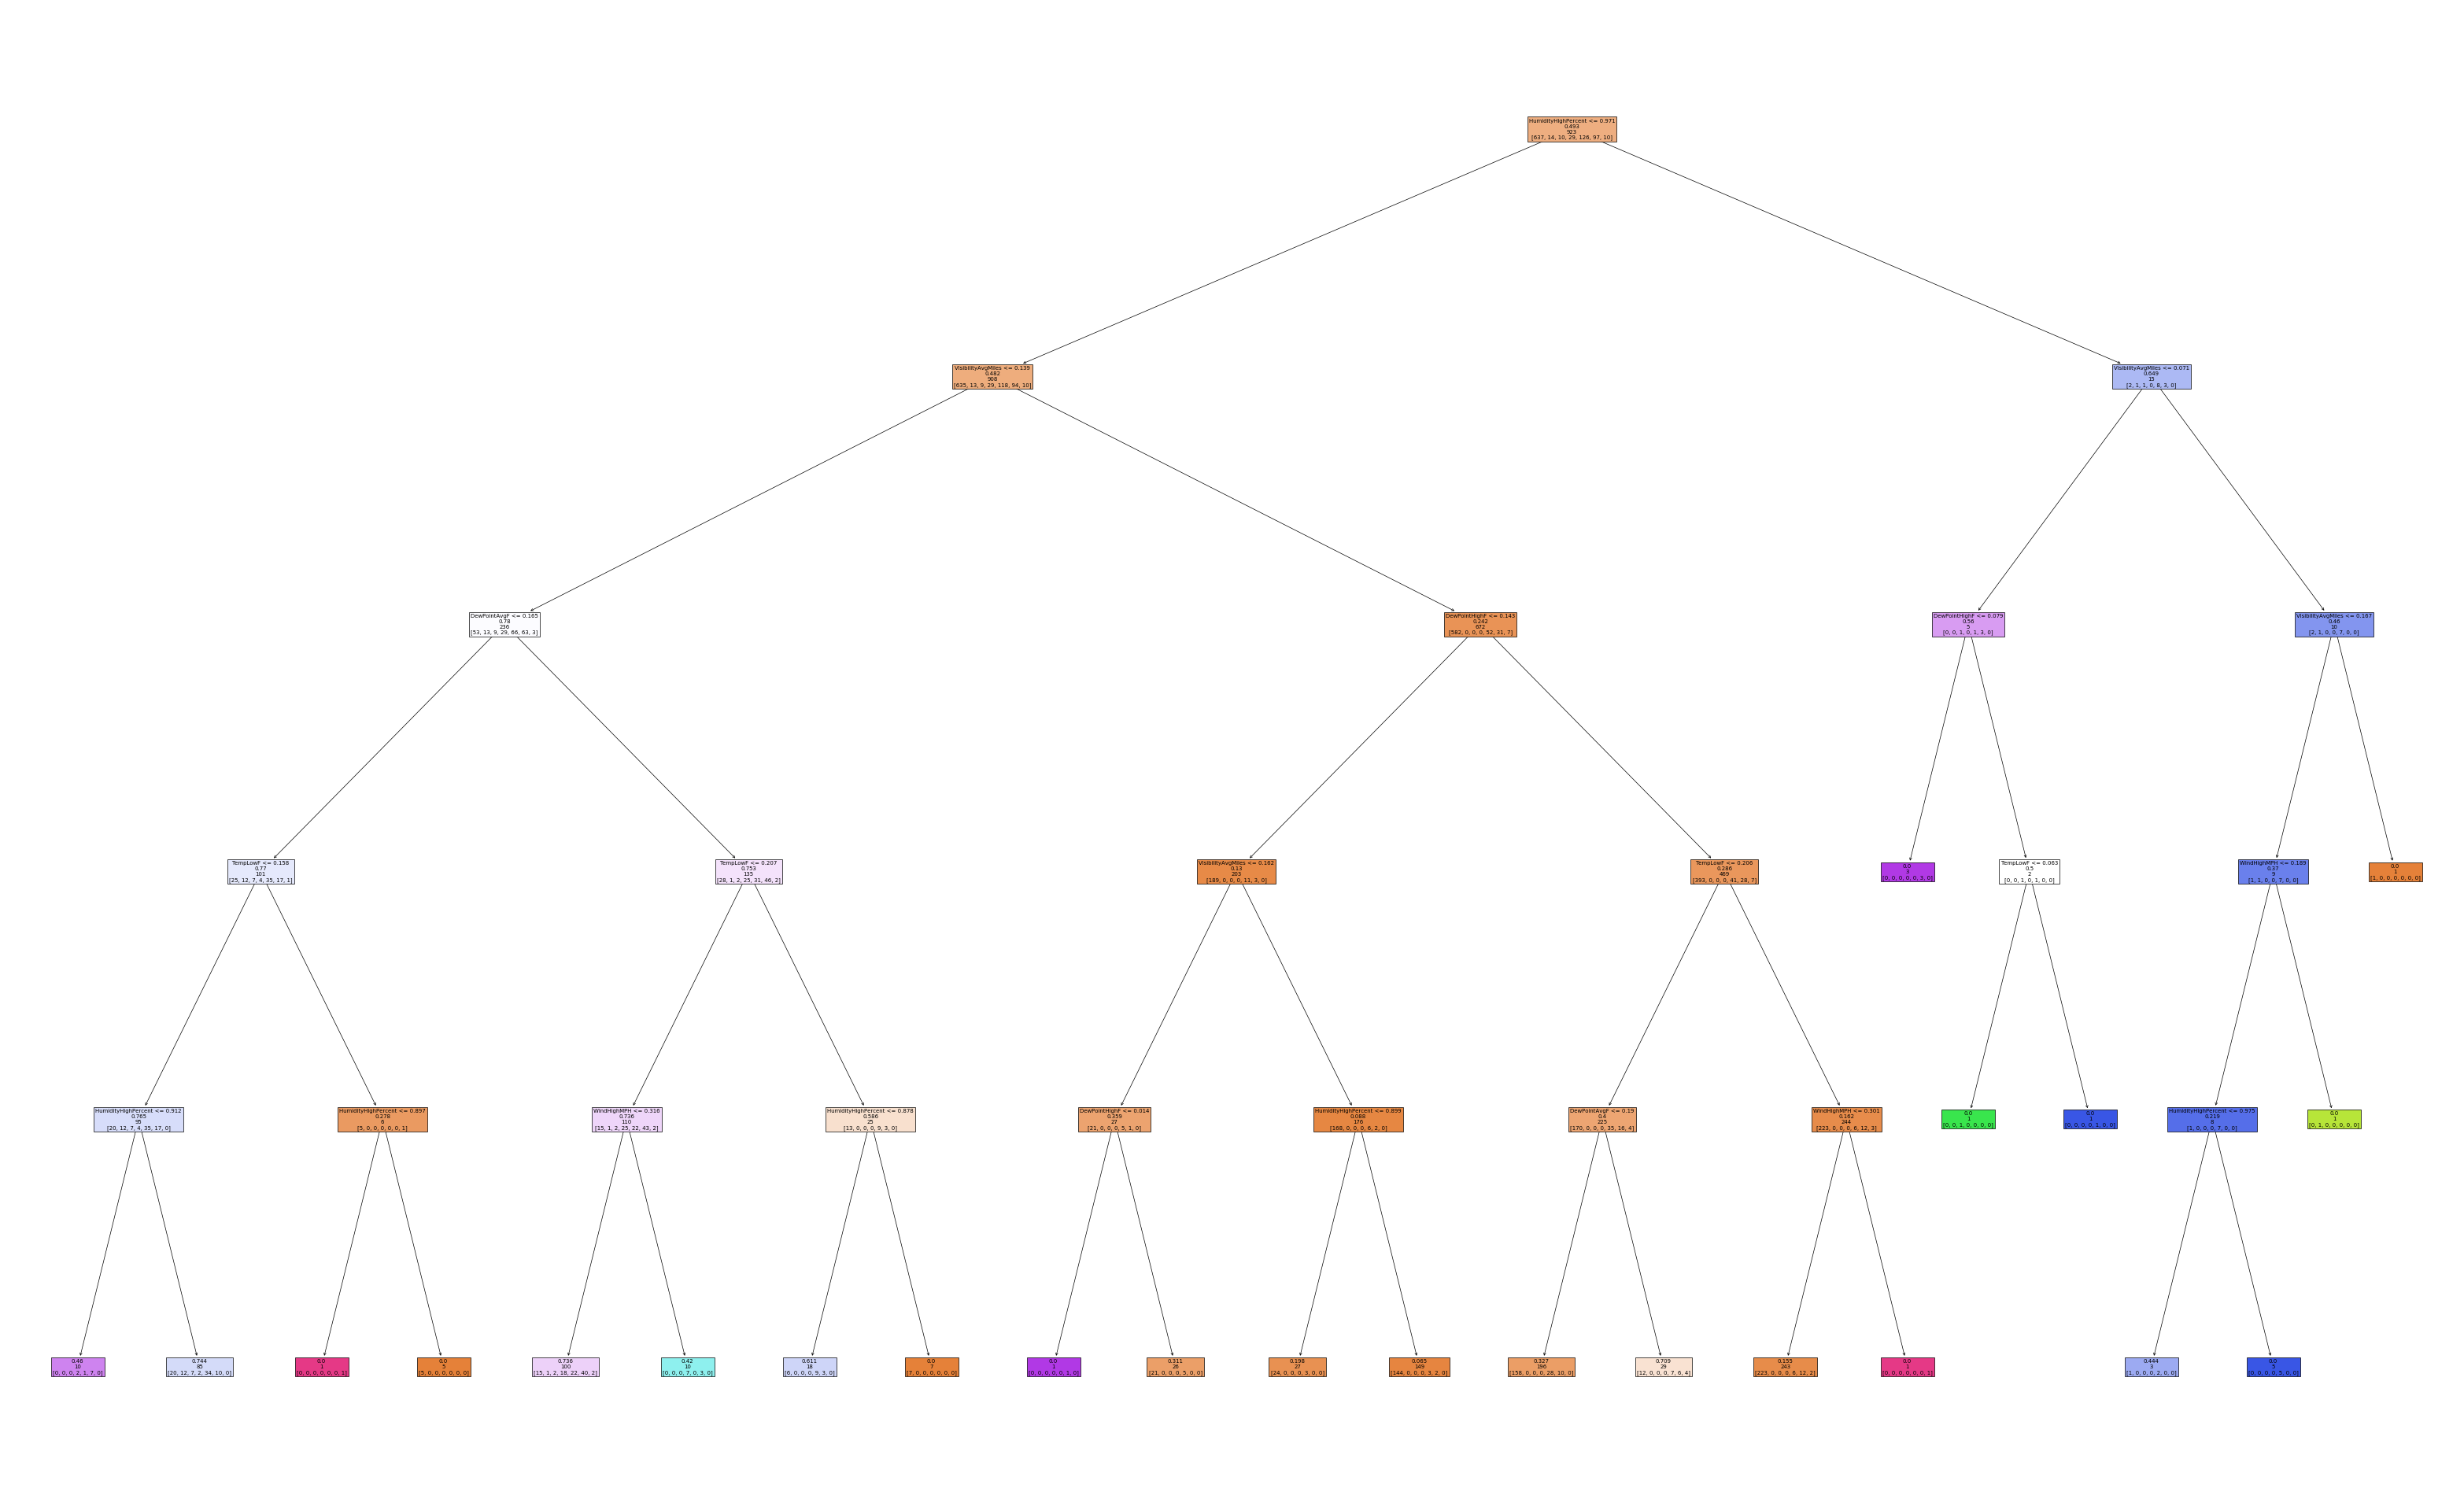

Wall time: 1.75 s


In [54]:
%%time

estimator = RFclf.estimators_[5]
plt.figure(figsize=(80, 50),dpi=50)

tree.plot_tree(estimator.fit(Xtrain, Ytrain), filled=True, label=all, fontsize=10, feature_names=FeaturesDT) 
plt.show()

In [55]:
#%%time
#This section is abundant because a matplotlib written instead. THis makes it so graphviz is no longer needed. 
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus

#estimator = RFclf.estimators_[5]
# Export as dot file
#export_graphviz(estimator, out_file='tree.dot', 
#                feature_names = FeaturesDT,
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')

---------------------
---------------------

## Model: KNearest Neighbors Classifier

In [56]:
'''
Create an instance of the model with 3 neighbors.
'''
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
print("Training accuracy: {}".format(accuracy_score(Ytrain, neigh.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, neigh.predict(Xtest))))

Training accuracy: 0.8125677139761647
Testing accuracy : 0.6666666666666666


In [58]:
Scores_kfold1 = cross_val_score(neigh, X_n, Y, cv=10, scoring='accuracy')
print("Cross validation Accuracy mean : {}".format(Scores_kfold1.mean()))

Cross validation Accuracy mean : 0.7007201861008092


### KNN using gridsearchCV

[0.6480830576356278, 0.7043708496064808, 0.7007201861008092, 0.7226933877499724, 0.7135714657506038, 0.7195831368990128, 0.7160182655923789, 0.7151301207033587, 0.7128226852678481, 0.7151914636748771, 0.7173417716181418, 0.7158782282220426, 0.7150992943027996, 0.7173881284712748, 0.712051390940438, 0.7151167083053841, 0.7143299484648342, 0.7151727885024833, 0.7227131649513856, 0.7189750554205917, 0.7249708272936448, 0.7220242224953377, 0.7220073874785028, 0.7212832127768738, 0.7213335137890894, 0.7190139843925142, 0.7197778710901044, 0.7190331174146806, 0.7198075792558765, 0.7190434374532115]


Text(0, 0.5, 'Cross-Validated Accuracy')

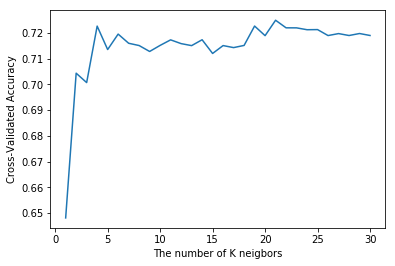

In [59]:
'''
The optimal amount of neighbors (k) needs to be found for KNN. This is done by making a for loop
first a list from 1 to 30 is created. This is going to indicate the numbers of neighbors.
'''
k_test_neighbor = range(1, 31)

# the scores of the neighbors will be saved in this
knn_scorings = []

# This is the actual loop. All k values will be testd. 
for k in k_test_neighbor:
    # The KNN classifier is run with the different neighbors
    neigh = KNeighborsClassifier(n_neighbors=k)
    # Cross validation score is run on all the iterations of the model. It is then saved in the "scores"
    KNNscores = cross_val_score(neigh, X_n, Y, cv=10, scoring='accuracy')
    # The mean score for all of the itterations are appended. 
    knn_scorings.append(KNNscores.mean())
print(knn_scorings)

# Finally, a plot of all the values with the neighbors is plotted.
plt.plot(k_test_neighbor, knn_scorings)
plt.xlabel('The number of K neigbors')
plt.ylabel('Cross-Validated Accuracy')

In [60]:
%%time
'''
Four neighbors is the optimal amount of neighbors for the model
based on cross-validation from previous cell
Train and test the model using the K-fold validation function.
'''

neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(Xtrain, Ytrain) 
print("Training accuracy: {}".format(accuracy_score(Ytrain, neigh.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, neigh.predict(Xtest))))
checkKfoldAcc(neigh, X_n, Y)

Training accuracy: 0.7908992416034669
Testing accuracy : 0.6944444444444444
This is the settings for the model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
Accuracy mean : 0.7226933877499724
F-Score mean : 0.6772025772560081
Precision mean : 0.3474150010092293
Recall mean : 0.31546313892178557
Wall time: 301 ms


---------------------
---------------------

## Model: Linear Regression

In [61]:
'''
Create an instance of the model
'''
LR_model = LinearRegression()
LR_model.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
ypredicts = LR_model.predict(Xtest)

print("prediction:")
print(ypredicts[:3])
print("Test data:")
print(Ytest[:3])

prediction:
[[2.6538985 ]
 [0.42743432]
 [3.26024399]]
Test data:
[[5]
 [0]
 [8]]


In [63]:
mse = np.mean((ypredicts -Ytest)**2)
print("MSE: {}".format(mse))
print("model intercept: ", LR_model.intercept_)
print("model coefficienct: ", LR_model.coef_)

MSE: 5.612660114502456
model intercept:  [11.73229618]
model coefficienct:  [[ -1.62474281   2.97203317  -8.45380218   3.49614306  -5.60609908
  -38.56407596   6.73626839]]


---------------------
---------------------

## Model: AdaBoost

In [64]:
'''
Create an instance of the model.
'''
Adaclf = AdaBoostClassifier(n_estimators=100)
Adaclf.fit(Xtrain, Ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [65]:
print("Adaclf score: ", Adaclf.score(Xtrain, Ytrain))

Adaclf score:  0.676056338028169


In [66]:
'''
Train and test the model using the K-fold validation function
'''
print("Training accuracy: {}".format(accuracy_score(Ytrain, Adaclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, Adaclf.predict(Xtest))))

checkKfoldAcc(Adaclf, X_n, Y)

Training accuracy: 0.676056338028169
Testing accuracy : 0.6414141414141414
This is the settings for the model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)
Accuracy mean : 0.5540634989013772
F-Score mean : 0.5705660977281465
Precision mean : 0.21638443360963655
Recall mean : 0.2632291810111359


---------------------
---------------------

## Model: Multilayered Perception Clasifier NN

In [67]:
'''
Create an instance of the model, specifying the settings.
Hidden layer sizes: 30, 30, 30, 30, 30, 30
Random_state: 1
Remaining settings: default values
'''
MLPclf = MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30, 30, 30), random_state=1)

MLPclf.fit(Xtrain, Ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30, 30, 30, 30),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [68]:
print("Training accuracy: {}".format(accuracy_score(Ytrain, MLPclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, MLPclf.predict(Xtest))))

Training accuracy: 0.7518959913326111
Testing accuracy : 0.7247474747474747


In [69]:
%%time
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(Ytest, MLPclf.predict(Xtest)))
print(classification_report(Ytest, MLPclf.predict(Xtest)))

checkKfoldAcc(MLPclf, X_n, Y)

[[251   0   0   0   0   8   0   7   0]
 [  2   0   0   0   0   5   0   0   0]
 [  1   0   0   0   0   2   0   1   0]
 [  0   0   0   1   0   1   0   2   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 34   0   0   4   0  23   0   5   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 15   0   0   4   0   9   0  12   0]
 [  6   0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       266
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.11      0.25      0.15         4
           4       0.00      0.00      0.00         1
           5       0.45      0.35      0.39        66
           6       0.00      0.00      0.00         1
           7       0.44      0.30      0.36        40
           8       0.00      0.00      0.00         7

    accuracy                           0.72       396
   macro avg       0.20      0.20      0.20       39

In [70]:
%%time
'''
Create an instance of the model, specifying the settings.
Hidden layer sizes: 30, 30, 30, 30, 30, 30
Random_state: 1
Remaining settings: default values
Train and test the model using the K-fold validation function
'''
MLPclf = MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30, 30, 30), random_state=1)

MLPclf.fit(Xtrain, Ytrain)

print("Training accuracy: {}".format(accuracy_score(Ytrain, MLPclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, MLPclf.predict(Xtest))))

print(confusion_matrix(Ytest, MLPclf.predict(Xtest)))
print(classification_report(Ytest, MLPclf.predict(Xtest)))

checkKfoldAcc(MLPclf, X_n, Y)

Training accuracy: 0.7518959913326111
Testing accuracy : 0.7247474747474747
[[251   0   0   0   0   8   0   7   0]
 [  2   0   0   0   0   5   0   0   0]
 [  1   0   0   0   0   2   0   1   0]
 [  0   0   0   1   0   1   0   2   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 34   0   0   4   0  23   0   5   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 15   0   0   4   0   9   0  12   0]
 [  6   0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       266
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.11      0.25      0.15         4
           4       0.00      0.00      0.00         1
           5       0.45      0.35      0.39        66
           6       0.00      0.00      0.00         1
           7       0.44      0.30      0.36        40
           8       0.00      0.00      0.00         7

    accuracy                  

In [71]:
%%time
'''
Create an instance of the model, specifying the settings.
Hidden layer sizes: 200, 200, 50, 150
Random_state: 1
Remaining settings: default values
Train and test the model using the K-fold validation function
'''
MLPclf = MLPClassifier(hidden_layer_sizes=(200, 200, 50, 150), random_state=1)

MLPclf.fit(Xtrain, Ytrain)

print("Training accuracy: {}".format(accuracy_score(Ytrain, MLPclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, MLPclf.predict(Xtest))))

print(confusion_matrix(Ytest, MLPclf.predict(Xtest)))
print(classification_report(Ytest, MLPclf.predict(Xtest)))

checkKfoldAcc(MLPclf, X_n, Y)

Training accuracy: 0.761646803900325
Testing accuracy : 0.7222222222222222
[[252   0   0   0   0   9   0   5   0]
 [  2   0   0   0   0   5   0   0   0]
 [  1   0   0   0   0   3   0   0   0]
 [  0   0   0   1   0   0   0   3   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 34   0   0   3   0  23   0   6   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 16   0   0   3   0  11   0  10   0]
 [  6   0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       266
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.14      0.25      0.18         4
           4       0.00      0.00      0.00         1
           5       0.43      0.35      0.38        66
           6       0.00      0.00      0.00         1
           7       0.42      0.25      0.31        40
           8       0.00      0.00      0.00         7

    accuracy                   

In [72]:
%%time
'''
Create an instance of the model, specifying the settings.
Hidden layer sizes: 100, 25, 10, 25
Random_state: 1
Remaining settings: default values
Train and test the model using the K-fold validation function
'''
MLPclf = MLPClassifier(hidden_layer_sizes=(100, 25, 10, 25), random_state=1)

MLPclf.fit(Xtrain, Ytrain)

print("Training accuracy: {}".format(accuracy_score(Ytrain, MLPclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, MLPclf.predict(Xtest))))

print(confusion_matrix(Ytest, MLPclf.predict(Xtest)))
print(classification_report(Ytest, MLPclf.predict(Xtest)))
checkKfoldAcc(MLPclf, X_n, Y)

Training accuracy: 0.7486457204767064
Testing accuracy : 0.7171717171717171
[[256   0   0   0   0   6   0   4   0]
 [  1   0   0   0   0   6   0   0   0]
 [  1   0   0   1   0   1   0   1   0]
 [  0   0   0   1   0   1   0   2   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 38   0   0   3   0  18   0   7   0]
 [  1   0   0   0   0   0   0   0   0]
 [ 19   0   0   3   0   9   0   9   0]
 [  6   0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       266
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.12      0.25      0.17         4
           4       0.00      0.00      0.00         1
           5       0.42      0.27      0.33        66
           6       0.00      0.00      0.00         1
           7       0.39      0.23      0.29        40
           8       0.00      0.00      0.00         7

    accuracy                  

In [73]:
%%time
'''
Create an instance of the model, specifying the settings.
Hidden layer sizes: 100, 25, 10, 25
Random_state: 1
learning_rate: adaptive
Remaining settings: default values
Train and test the model using the K-fold validation function
'''
MLPclf = MLPClassifier(hidden_layer_sizes=(100, 25, 10, 25), random_state=1, learning_rate='adaptive')

MLPclf.fit(Xtrain, Ytrain)

print("Training accuracy: {}".format(accuracy_score(Ytrain, MLPclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, MLPclf.predict(Xtest))))

print(confusion_matrix(Ytest, MLPclf.predict(Xtest)))
print(classification_report(Ytest, MLPclf.predict(Xtest)))
checkKfoldAcc(MLPclf, X_n, Y)

Training accuracy: 0.7486457204767064
Testing accuracy : 0.7171717171717171
[[256   0   0   0   0   6   0   4   0]
 [  1   0   0   0   0   6   0   0   0]
 [  1   0   0   1   0   1   0   1   0]
 [  0   0   0   1   0   1   0   2   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 38   0   0   3   0  18   0   7   0]
 [  1   0   0   0   0   0   0   0   0]
 [ 19   0   0   3   0   9   0   9   0]
 [  6   0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       266
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.12      0.25      0.17         4
           4       0.00      0.00      0.00         1
           5       0.42      0.27      0.33        66
           6       0.00      0.00      0.00         1
           7       0.39      0.23      0.29        40
           8       0.00      0.00      0.00         7

    accuracy                  

In [74]:
%%time
'''
Create an instance of the model, specifying the settings.
Hidden layer sizes: 20, 20, 20, 50
Random_state: 1
learning_rate: adaptive
Remaining settings: default values
Train and test the model using the K-fold validation function
'''
MLPclf = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 50), random_state=1, learning_rate='adaptive')

MLPclf.fit(Xtrain, Ytrain)

print("Training accuracy: {}".format(accuracy_score(Ytrain, MLPclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, MLPclf.predict(Xtest))))

print(confusion_matrix(Ytest, MLPclf.predict(Xtest)))
print(classification_report(Ytest, MLPclf.predict(Xtest)))
checkKfoldAcc(MLPclf, X_n, Y)

Training accuracy: 0.7302275189599133
Testing accuracy : 0.7045454545454546
[[254   0   0   2   0  10   0   0   0]
 [  1   0   0   1   0   5   0   0   0]
 [  1   0   0   2   0   1   0   0   0]
 [  0   0   0   1   0   2   0   1   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 37   0   0   6   0  22   0   1   0]
 [  1   0   0   0   0   0   0   0   0]
 [ 18   0   0   4   0  16   0   2   0]
 [  6   0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       266
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.06      0.25      0.10         4
           4       0.00      0.00      0.00         1
           5       0.38      0.33      0.35        66
           6       0.00      0.00      0.00         1
           7       0.50      0.05      0.09        40
           8       0.00      0.00      0.00         7

    accuracy                  

In [75]:
%%time
'''
Create an instance of the model, specifying the settings.
Hidden layer sizes: 40, 40, 50, 40
Learning_rate: adaptive
Remaining settings: default values
Train and test the model using the K-fold validation function
'''
MLPclf = MLPClassifier(hidden_layer_sizes=(40, 40, 50, 40), learning_rate='adaptive')

MLPclf.fit(Xtrain, Ytrain)

print("Training accuracy: {}".format(accuracy_score(Ytrain, MLPclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, MLPclf.predict(Xtest))))

print(confusion_matrix(Ytest, MLPclf.predict(Xtest)))
print(classification_report(Ytest, MLPclf.predict(Xtest)))
checkKfoldAcc(MLPclf, X_n, Y)

Training accuracy: 0.7497291440953413
Testing accuracy : 0.7272727272727273
[[252   0   0   0   0   9   0   5   0]
 [  1   0   0   0   0   6   0   0   0]
 [  1   0   0   1   0   1   0   1   0]
 [  0   0   0   1   0   1   0   2   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 34   0   0   4   0  22   0   6   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 16   0   0   4   0   7   0  13   0]
 [  6   0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       266
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.10      0.25      0.14         4
           4       0.00      0.00      0.00         1
           5       0.45      0.33      0.38        66
           6       0.00      0.00      0.00         1
           7       0.48      0.33      0.39        40
           8       0.00      0.00      0.00         7

    accuracy                  

In [76]:
%%time
'''
Create an instance of the model, specifying the settings.
Hidden layer sizes: 30, 30, 30
Learning_rate: adaptive
Remaining settings: default values
Train and test the model using the K-fold validation function
'''
MLPclf = MLPClassifier(hidden_layer_sizes=(30, 30, 30), learning_rate='adaptive')

MLPclf.fit(Xtrain, Ytrain)

print("Training accuracy: {}".format(accuracy_score(Ytrain, MLPclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, MLPclf.predict(Xtest))))

print(confusion_matrix(Ytest, MLPclf.predict(Xtest)))
print(classification_report(Ytest, MLPclf.predict(Xtest)))
checkKfoldAcc(MLPclf, X_n, Y)

Training accuracy: 0.7258938244853738
Testing accuracy : 0.7095959595959596
[[256   0   0   2   0   8   0   0   0]
 [  1   0   0   0   0   4   0   2   0]
 [  1   0   0   1   0   0   0   2   0]
 [  0   0   0   1   0   2   0   1   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 39   0   0   5   0  19   0   3   0]
 [  0   0   0   0   0   1   0   0   0]
 [ 24   0   0   4   0   7   0   5   0]
 [  6   0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       266
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.08      0.25      0.12         4
           4       0.00      0.00      0.00         1
           5       0.44      0.29      0.35        66
           6       0.00      0.00      0.00         1
           7       0.38      0.12      0.19        40
           8       0.00      0.00      0.00         7

    accuracy                  

---------------------
---------------------

## Model: Naive Bayes

In [77]:
%%time
'''
Create an instance of the model.
Train and test the model using the K-fold validation function
'''

NBclf = GaussianNB()
NBclf.fit(Xtrain, Ytrain)
print("This is the settings of the model:", NBclf)
print("Training accuracy: {}".format(accuracy_score(Ytrain, NBclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, NBclf.predict(Xtest))))
checkKfoldAcc(NBclf, X_n, Y)

This is the settings of the model: GaussianNB(priors=None, var_smoothing=1e-09)
Training accuracy: 0.5167930660888408
Testing accuracy : 0.51010101010101
This is the settings for the model: GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy mean : 0.49554675526346414
F-Score mean : 0.5532030403252846
Precision mean : 0.2704785578285966
Recall mean : 0.3185232923578788
Wall time: 134 ms


---------------------
---------------------

## Model: XGBoost

In [78]:
%%time
'''
Create an instance of the model.
Fit model training data without the pipeline function - with all default settings
Train and test the model using the K-fold validation function
'''
 
XGBclf = XGBClassifier()
XGBclf.fit(Xtrain, Ytrain)

print("Training accuracy: {}".format(accuracy_score(Ytrain, XGBclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, XGBclf.predict(Xtest))))
checkKfoldAcc(XGBclf, X_n, Y)

Training accuracy: 0.8992416034669556
Testing accuracy : 0.7070707070707071
This is the settings for the model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy mean : 0.7234924517901921
F-Score mean : 0.6887812102695026
Precision mean : 0.2723795887093173
Recall mean : 0.259223883885538
Wall time: 23.6 s


In [79]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function: default settings
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.8992416034669556
Testing accuracy : 0.7070707070707071
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.7234924517901921
F-Score mean : 0.6887812102695026
Precision mean : 0.2723795887093173
Recall mean : 0.25922388

In [80]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Change booster: gblinear
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(booster='gblinear',random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gblinear',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.6848508981463299
F-Score mean : 0.5568056364701428
Precision mean : 0.09574244484676117
Recall mean : 0.13968

In [81]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Decrease learning_rate: 0.01
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(learning_rate=0.01, random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.8017334777898159
Testing accuracy : 0.7222222222222222
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.7265019107051436
F-Score mean : 0.6904829862733818
Precision mean : 0.28284171461575075
Recall mean : 0.252830

In [82]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Change booster: gblinear
    Decrease learning_rate: 0.01
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(booster = 'gblinear', learning_rate=0.01, random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gblinear',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.6848508981463299
F-Score mean : 0.5568056364701428
Precision mean : 0.09574244484676117
Recall mean : 0.1396

In [83]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Increase learning_rate: 0.5
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(learning_rate=0.5, random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 1.0
Testing accuracy : 0.696969696969697
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.5,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.7116166124471848
F-Score mean : 0.6843884610892238
Precision mean : 0.27453966390575885
Recall mean : 0.2450086296326898
Wall t

In [84]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Change booster: gblinear
    Increase learning_rate: 0.5
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(booster = 'gblinear', learning_rate=0.5, random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gblinear',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.5,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.6848508981463299
F-Score mean : 0.5568056364701428
Precision mean : 0.09574244484676117
Recall mean : 0.13968

In [85]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Increase Max Depth: 5
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(max_depth = 5, random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.971830985915493
Testing accuracy : 0.7171717171717171
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.7100745237876053
F-Score mean : 0.6754134504926503
Precision mean : 0.26434079902710755
Recall mean : 0.25612355

In [86]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Change booster: gblinear
    Increase Max Depth: 5
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(booster = 'gblinear', max_depth = 5, random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gblinear',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.6848508981463299
F-Score mean : 0.5568056364701428
Precision mean : 0.09574244484676117
Recall mean : 0.13968

In [87]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Decrease Max Depth: 2
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(max_depth = 2, random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.828819068255688
Testing accuracy : 0.7196969696969697
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.7273034626622716
F-Score mean : 0.6906532401707743
Precision mean : 0.27164319816546006
Recall mean : 0.26157885

In [88]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Change booster: gblinear
    Decrease Max Depth: 2
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(booster = 'gblinear', max_depth = 2, random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gblinear',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.6848508981463299
F-Score mean : 0.5568056364701428
Precision mean : 0.09574244484676117
Recall mean : 0.13968

In [89]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Change booster: bgtree
    Increase Max Depth: 5
    Decrease learning_rate: 0.01
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(booster = 'gbtree', max_depth = 5, learning_rate = 0.01 , random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.8439869989165764
Testing accuracy : 0.7146464646464646
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.7189007232939175
F-Score mean : 0.6820746737136414
Precision mean : 0.2635809682403307
Recall mean : 0.2485557

In [90]:
%%time
'''
Create an instance of the model.
Fit model training data with pipeline function:
    Change booster: gblinear
    Increase Max Depth: 5
    Decrease learning_rate: 0.01
Train and test the model using the K-fold validation function
'''

pl_xgb = Pipeline(steps= [('xgboost', xgb.XGBClassifier(booster = 'gblinear', max_depth = 5, learning_rate = 0.01 , random_state=42))])
pl_xgb.fit(Xtrain, Ytrain)
scores = cross_val_score(pl_xgb, X_n, Y, cv=10)

print("Training accuracy: {}".format(accuracy_score(Ytrain, pl_xgb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, pl_xgb.predict(Xtest))))
checkKfoldAcc(pl_xgb, X_n, Y)

Training accuracy: 0.6901408450704225
Testing accuracy : 0.6717171717171717
This is the settings for the model: Pipeline(memory=None,
         steps=[('xgboost',
                 XGBClassifier(base_score=0.5, booster='gblinear',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)
Accuracy mean : 0.6848508981463299
F-Score mean : 0.5568056364701428
Precision mean : 0.09574244484676117
Recall mean : 0.1396

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Training accuracy: 0.8017334777898159
Testing accuracy : 0.7222222222222222


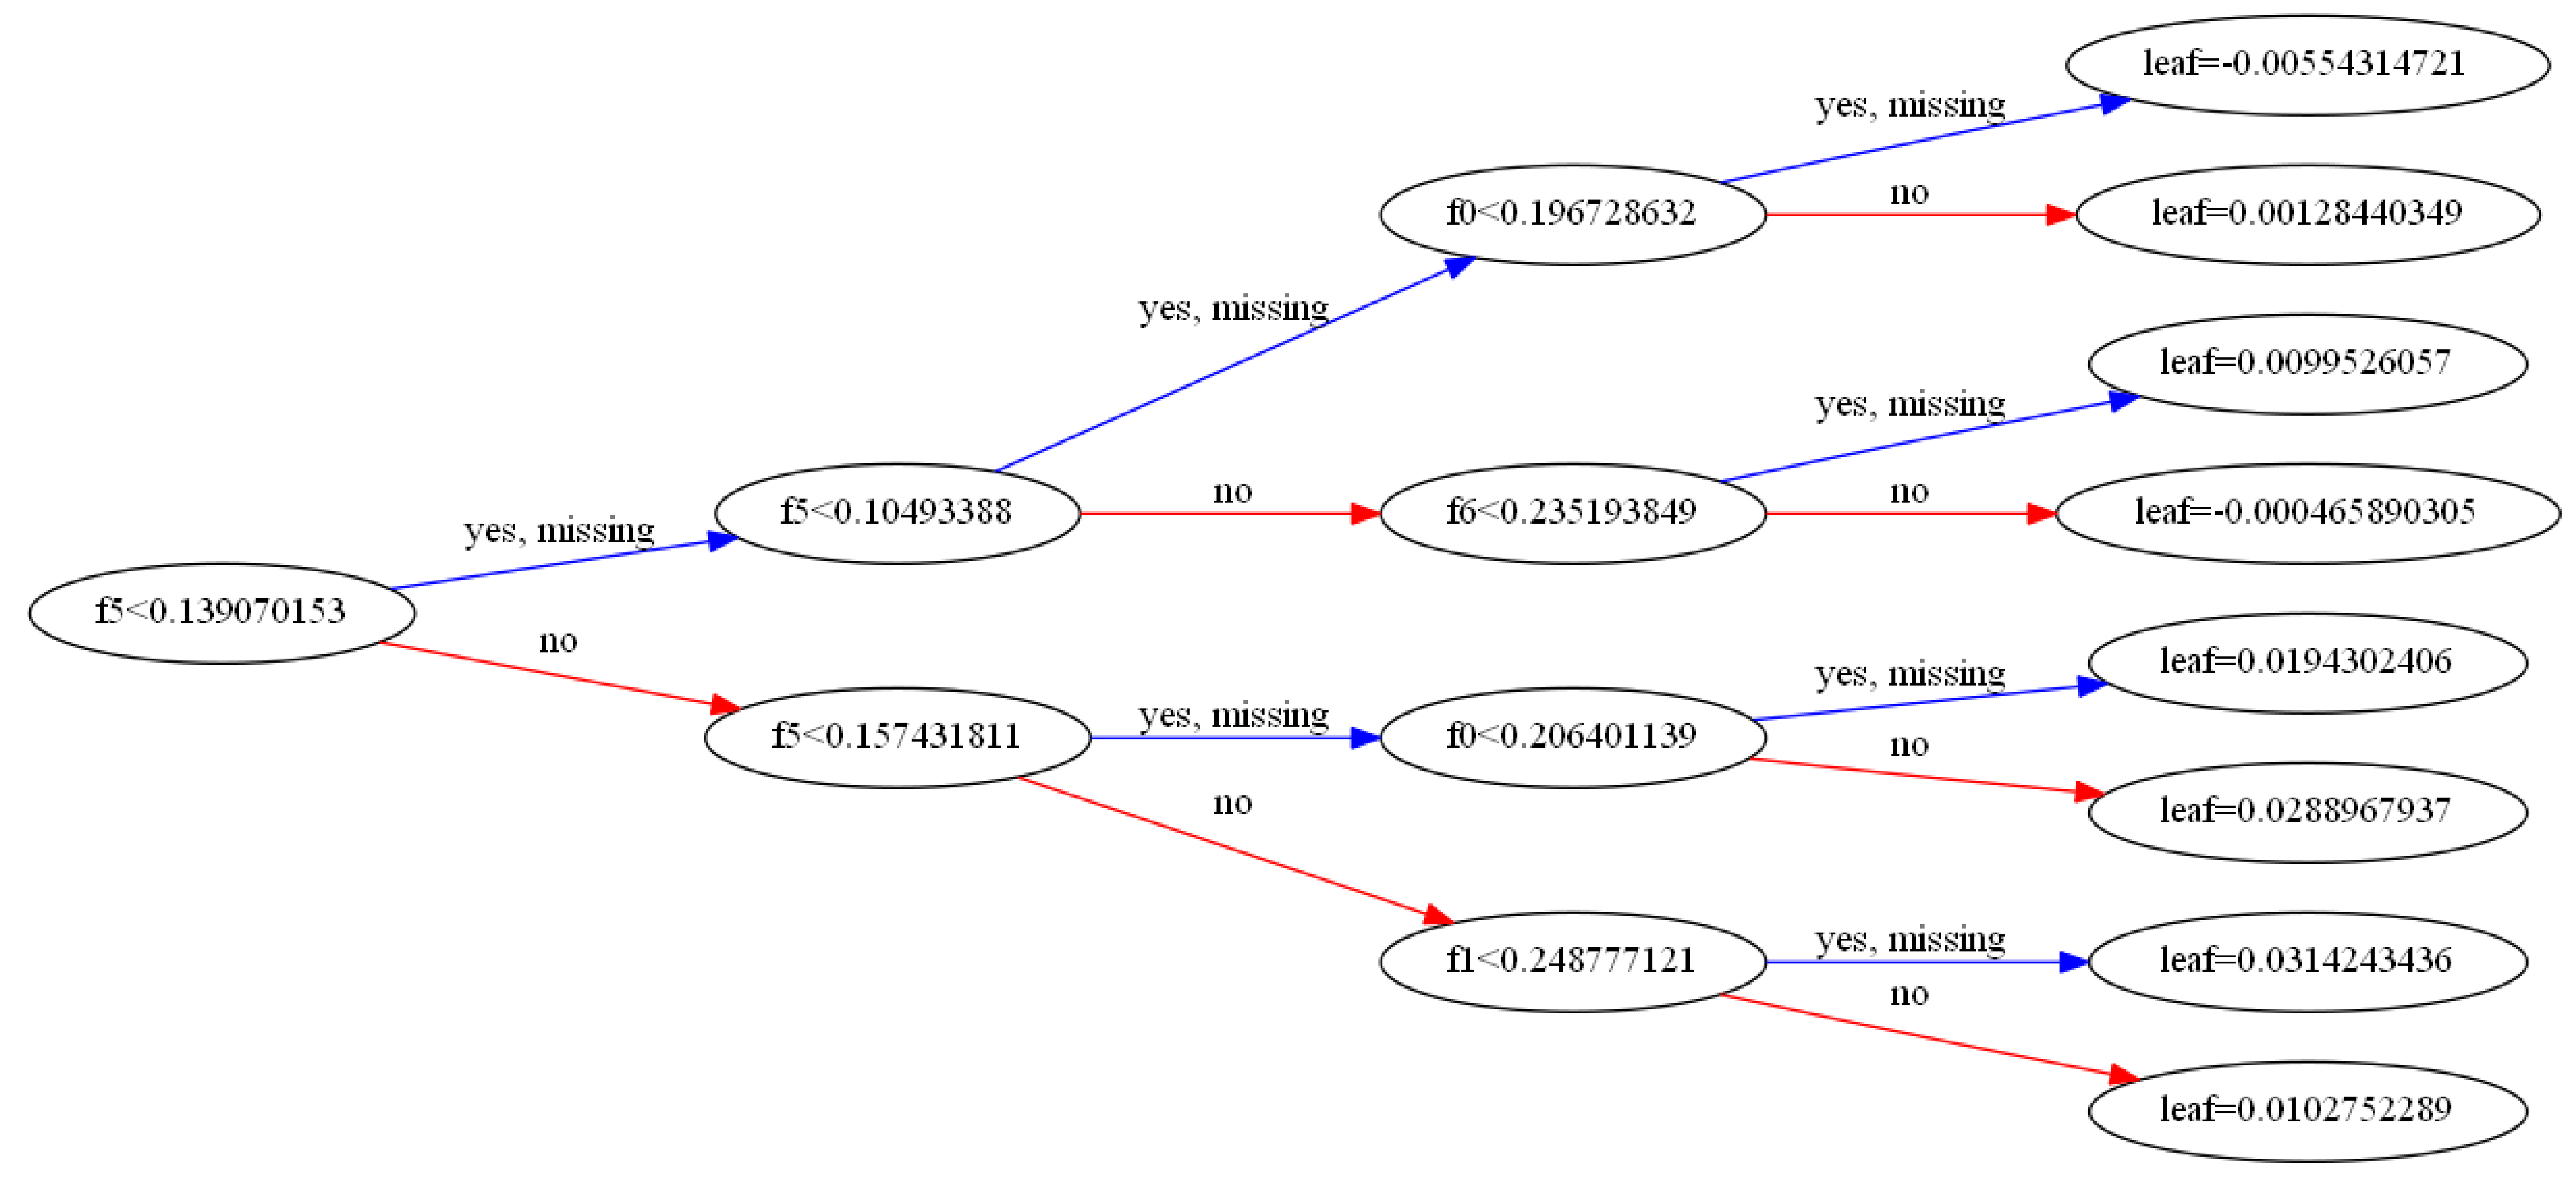

Wall time: 4.87 s


In [91]:
%%time
'''
Create an instance of the model.
Fit model training data without pipeline function:
    Reduce learning_rate: 0.01
Train and test the model using the K-fold validation function
Visualize the graph for this model
'''
XGBclf = XGBClassifier(learning_rate=0.01, random_state=42)
XGBclf.fit(Xtrain, Ytrain)

print(XGBclf)

print("Training accuracy: {}".format(accuracy_score(Ytrain, XGBclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(Ytest, XGBclf.predict(Xtest))))

##set up the parameters for the figure plot
rcParams['figure.figsize'] = 80,50
#xgb.to_graphviZZZz(XGBclf) - not used anymore as upgraded to plt
plot_tree(XGBclf, rankdir='LR')
plt.savefig('XGBTree.png')
plt.show()

## Results for the XGBoost 
### Comparison of the models


| Booster | Learning Rate | Max depth | Train Accuracy | Test Accuracy | Cross Validation Accuracy | 
| --- | --- | --- | --- | --- | --- | 
| gbtree | 0.1 | 3 | 0.8992 | 0.7071 | 0.7235 |
| gblinear | 0.1 | 3 | 0.6901 | 0.6717 | 0.6849 |
| gbtree | 0.01 | 3 | 0.8017 | 0.7222 | 0.7265 |
| gblinear | 0.01 | 3 | 0.6901 | 0.6717 | 0.6849 |
| gbtree | 0.5 | 3 | 1.0 | 0.6970 | 0.7116 |
| gblinear | 0.5 | 3 | 0.6901 | 0.6717 | 0.6849 |
| gbtree | 0.1 | 5 | 0.9718 | 0.7172 | 0.7101 |
| gblinear | 0.1 | 5 | 0.6901 | 0.6717 | 0.6849 |
| gbtree | 0.1 | 2 | 0.8288 | 0.7197 | 0.7273 | #best based on CV
| gblinear | 0.1 | 2 | 0.6901 | 0.6717 | 0.6849 |
| gbtree | 0.01 | 5 | 0.8440 | 0.7146 | 0.7189 |
| gblinear | 0.01 | 5 | 0.6901 | 0.6717 | 0.6849 |



---------------------
---------------------

## Comparison of all models

| ML Model | Accuracy | Presicion | Recall | 
| :--- | --- | --- | --- | 
| Decision Tree | 72.63% | 27.71% | 27.12% | 
| Random Forest | 71.15% | 21.30% | 20.23% | 
| SVM | 68.46% | 10.34% | 15.12% |
| MLP NN | 74.01% | 28.96% | 27.26% |
| KNN | 72.27% | 34.74% | 31.55% |
| NB | 49.55% | 27.05% | 31.85% |
| AdaBoost | 55.41 | 21.64% | 26.32% |
| XGBoost | 72.73% | 27.16% | 26.16% |


Linear Regression Mean Squared Error: 5.61 <br>

Based on the results, the XGBooster model seems to be the best model. 

